### Mean Shift(평균이동) 개요
- K-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동
- 평균이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킴.
- 데이터의 분포도를 이용해 군집 중심점을 찾아 간다. 이를위해 확률밀도함수를 이용한다.
- 평균이동은 K-평균과 다르게 군집의 개수를 지정할 필요가 없다. 
- 대역폭의 크기에 따라 알로리즘 자체에서 군집의 개수를 최적으로 정한다.
- 사이킷런은 평균이동군집화를 위해 MeanShift 클래스를 제공한다.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

# make_blobs()의 cluster_std를 0.8로 정한 3개의 군집의 데이터에 대해 
# bandwidth를 0.9로 설정한 평균이동알고리즘을 적용한 예제 
# 일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐.

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


In [2]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


### estimate_bandwidth()
- bandwidth를 1.0으로 조절하니 3개의 군집으로 잘 군집화 됨.
- MeanShift에서는 bandwidth를 최적화 값으로 설정하는 것이 매우 중요하다.
- 최적화된 bandwidth 값을 찾기 위해 estimate_bandwidth()를 제공한다.
- estimate_bandwidth()로 피처 데이터 세트를 입력하면 최적화된 bandwidth 값을 반환해 준다.

In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


In [4]:
# estimate_bandwidth()로 측정된 bandwidth를 평균이동입력 값으로 적용해 
# 동일한 make_blobs()데이터 세트에 군집화 수행

import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


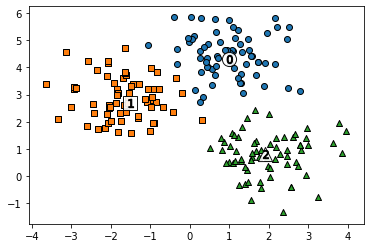

In [5]:
# 구성된 3개의 군집을 시각화
# 평균이동도 K-평균과 유사하게 중심을 가지고 있으므로 
# Cluster_centers_ 속성으로 군집 중심 좌표를 표시할 수 있다. 

import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64


### 평균이동의 장단점
장점
- 유연한 군집화 가능
- 이상치의 영향을 받지 않는다.
- 미리 군집의 개수를 정할 필요가 없다.

단점
- 알고리즘 수행시간이 오래걸린다.
- bandwidth의 크기에 따른 군집화 영향도가 매우 크다.

### 평균 이동 군집화 기법의 사용 영역
- 업무기반의 데이터 세트보다는 컴퓨터비전 영역에서 주로 사용
- 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역활을 수행하는 알고리즘